# # Import libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## giving dataset

In [9]:
to_train = pd.read_csv('train.csv')
to_test = pd.read_csv('test.csv')

to_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,8,1970,3,753,1085,1120,2,8,2006,2006,281000
1,6,1632,1,338,1240,1632,2,6,1958,1988,139000
2,7,1223,2,480,600,520,2,4,2005,2005,147400
3,5,1559,2,812,1559,1559,1,5,1948,1973,153500
4,4,630,1,286,630,630,1,3,1970,2002,86000


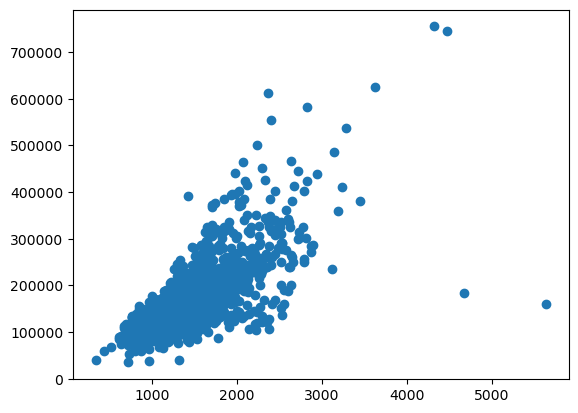

In [80]:
quality = to_train.iloc[:, 1]
sale_price = to_train.iloc[:, -1]

no_of_X_columns = len(to_train.columns)-1

X_to_train = to_train.loc[:, to_train.columns[:len(to_train.columns)-1]]
Y_to_train = to_train.loc[:, to_train.columns[-1]]

X_train = np.array(X_to_train)
Y_train = np.array(Y_to_train)

plt.scatter(quality, sale_price)

In [78]:
#CONSTANTLY GETTING ERRORS FOR CALCULATION.



def z_normalizer_for_X(X):
    mean = np.mean(X)
    standard = np.std(X)
    X_norm = (X - mean)/standard
    return X_norm

def z_normalizer_for_Y(Y):
    mean = np.mean(Y)
    standard = np.std(Y)
    Y_norm = (Y - mean)/standard
    return Y_norm

train = to_train.drop("SalePrice", axis=1)

mean = to_test.mean()
std = to_train.std()

sample = (to_test - mean.drop) / std.drop
train = (train - mean.drop("SalePrice")) / std.drop("SalePrice")


X_norms = z_normalizer_for_X(X_train)
Y_norms = z_normalizer_for_Y(Y_train)
print(X_norm)

TypeError: unsupported operand type(s) for -: 'int' and 'method'

In [82]:
def mse(y_true, y_predict):
    n = len(y_true)
    cost = np.sum((y_true - y_predict)**2) / (2*n)
    return cost

m_gradient = np.zeros(len(sample.columns)-1) 
b_gradient = 0 
learn_rate = 0.0001 
cmse = 0
epochs = 5000 
msefunc = [0 for x in range(epochs)] 

def gradient(X, y, w, b_gradient):
    n, m_gradient = X.shape
    dw = np.zeros(m_gradient)
    db = 0

    for i in range(n):
        y_predict = np.dot(w, X[i]) + b_gradient
        error = y_predict - y[i]

        for j in range(m_gradient):
            dw[j] += error * X[i][j]
        db += error

    dw = dw / n
    db = db / n

    return dw, db

def update_parameters(w, b, dw, db, alpha):
    w = w - alpha * dw
    b_gradient = 0 
    b_gradient = b_gradient - alpha * db

    return w, b


w = np.zeros(X_norm.shape[1])

for epoch in range(epochs):
    dw, db = gradient(X_norm, Y_train, w, b_gradient)
    w, b_gradient = update_parameters(w, b_gradient, dw, db, learn_rate)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: MSE = {mse(Y_train, np.dot(X_norm, w) + b_gradient)}")
        print(w, b_gradient)


Epoch 0: MSE = 19577430766.843967
[-17.8589981   19.02553487 -17.95993643  -6.21306362   7.84142464
   9.88130304 -17.96610752 -17.85193403  25.46834701  25.71441192] 0
Epoch 100: MSE = 16697582203.574955
[-1722.59735921  1846.39294635 -1732.35417684  -594.4972696
   764.72930392   960.04235324 -1732.95649946 -1721.92843841
  2457.20370554  2480.72533315] 0
Epoch 200: MSE = 14294212921.1144
[-3276.05652441  3533.53242707 -3294.65281422 -1121.25716092
  1470.74597733  1839.36700859 -3295.81219933 -3274.80880697
  4674.39962502  4718.71688325] 0
Epoch 300: MSE = 12288171485.92673
[-4691.39606386  5092.51479283 -4718.08629915 -1591.88394876
  2130.21258762  2653.92229109 -4719.76702004 -4689.64541505
  6695.71504099  6758.56493766] 0
Epoch 400: MSE = 10613458792.346115
[-5980.63241689  6534.36308783 -6014.73579512 -2011.30028794
  2747.07557851  3409.24880653 -6016.90519556 -5978.44813197
  8538.18806737  8617.5056978 ] 0
Epoch 500: MSE = 9215042535.56231
[-7154.73818222  7869.14358731 -7

Epoch 4200: MSE = 1893111023.5157437
[-18184.85835933  26544.24410988 -18301.39962557  -3198.34252702
  13262.84160708  14380.37156257 -18312.43009441 -18186.55753071
  26363.33113558  26471.85606063] 0
Epoch 4300: MSE = 1883722830.8019104
[-18192.58280768  26757.74586842 -18309.57767398  -3109.06589435
  13415.86394606  14505.61900677 -18320.75359359 -18194.56171787
  26387.27521491  26491.64481901] 0
Epoch 4400: MSE = 1874663023.058855
[-18197.16133168  26967.14752649 -18314.5915465   -3018.87586035
  13566.86934014  14628.51864269 -18325.91174856 -18199.42199604
  26406.72481454  26506.89877664] 0
Epoch 4500: MSE = 1865892037.8338296
[-18198.88242372  27172.72095799 -18316.73129742  -2927.88840574
  13715.95866475  14749.20908603 -18328.19468941 -18201.42669829
  26422.08919016  26518.03187527] 0
Epoch 4600: MSE = 1857376699.4620693
[-18198.00942307  27374.71493674 -18316.26169236  -2836.20921507
  13863.22451163  14867.81733396 -18327.86725111 -18200.83901832
  26433.74193209  2652

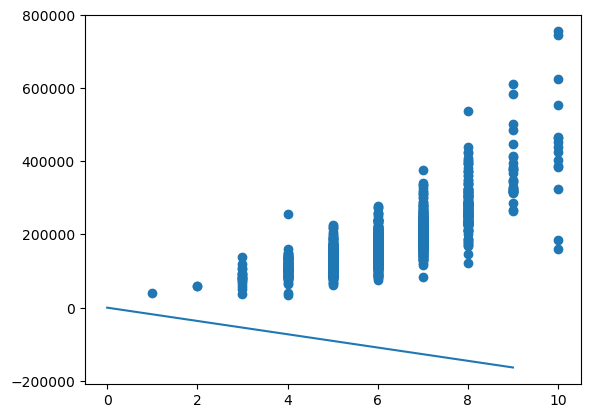

In [95]:
x = np.arange(0, max(to_train.iloc[:, 0]))
y = w[0]*x + b_gradient
plt.plot(x,y)

plt.scatter(to_train.iloc[:, 0], sale_price)

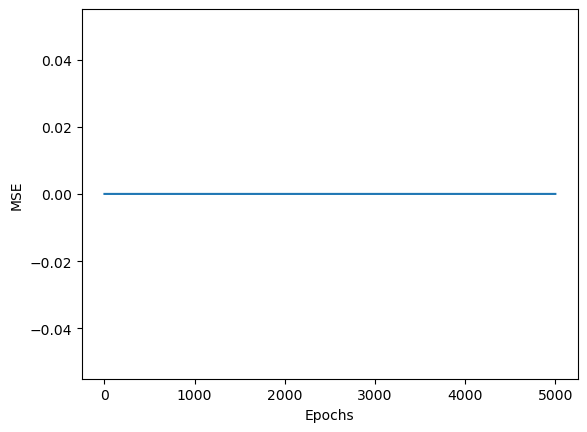


 Mean Squared Error: 0


In [93]:
plt.plot(range(epochs), msefunc)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()
print (f"\n Mean Squared Error: {cmse}")